In [80]:
!pip install pycaret


In [81]:
from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


In [82]:
from pycaret.datasets import get_data
dataset = get_data('bike')

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,1/1/2011,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16
1,2,1/1/2011,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40
2,3,1/1/2011,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,32
3,4,1/1/2011,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,13
4,5,1/1/2011,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1


In [83]:
del dataset['instant']

In [84]:
#check the shape of data
dataset.shape

(17379, 14)

In [85]:
data = dataset.sample(frac=0.9, random_state=786)
data_unseen = dataset.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (15641, 14)
Unseen Data For Predictions: (1738, 14)


In [86]:
from pycaret.regression import *
exp_reg101 = setup(data = data, target = 'cnt') 

,Description,Value
0,session_id,8382
1,Target,cnt
2,Original Data,"(15641, 14)"
3,Missing Values,False
4,Numeric Features,5
5,Categorical Features,7
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(10948, 37)"


In [87]:
best = compare_models(exclude = ['ransac'])

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,2.660980e+01,1.748648e+03,4.174450e+01,9.457000e-01,0.4213,0.4262,0.196
et,Extra Trees Regressor,2.603720e+01,1.796180e+03,4.233410e+01,9.442000e-01,0.3539,0.3366,4.209
rf,Random Forest Regressor,2.676440e+01,1.922945e+03,4.375410e+01,9.402000e-01,0.3557,0.3332,4.530
dt,Decision Tree Regressor,3.656540e+01,3.859673e+03,6.200510e+01,8.799000e-01,0.4603,0.4043,0.094
knn,K Neighbors Regressor,4.318130e+01,4.515200e+03,6.711700e+01,8.601000e-01,0.4501,0.4916,0.186
gbr,Gradient Boosting Regressor,4.811160e+01,4.931783e+03,7.018040e+01,8.471000e-01,0.6857,0.9601,1.054
ada,AdaBoost Regressor,8.772210e+01,1.141189e+04,1.067792e+02,6.455000e-01,1.0874,2.8879,0.744
lr,Linear Regression,1.043515e+02,1.942812e+04,1.393193e+02,3.981000e-01,1.2035,3.3677,0.309
ridge,Ridge Regression,1.043439e+02,1.942808e+04,1.393185e+02,3.981000e-01,1.2034,3.3643,0.028
br,Bayesian Ridge,1.043424e+02,1.943192e+04,1.393309e+02,3.980000e-01,1.2031,3.3595,0.044


In [88]:
ada = create_model('ada')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,93.6688,12737.1710,112.8591,0.5989,1.1293,3.2329
1,90.0458,11909.7296,109.1317,0.6428,1.1074,3.0326
2,86.3639,11048.7347,105.1130,0.6513,1.0506,2.6047
3,84.4780,10638.3114,103.1422,0.6399,1.0788,2.8184
4,84.3000,11064.0101,105.1856,0.6627,0.9892,2.2430
5,85.8398,10655.7175,103.2265,0.6896,1.0935,2.9697
6,88.5436,12031.4666,109.6880,0.6809,1.1011,3.0587
7,90.7728,11745.5724,108.3770,0.6394,1.1114,3.1809
8,88.9338,11684.7945,108.0962,0.6028,1.0872,2.6770
9,84.2744,10603.4325,102.9730,0.6469,1.1250,3.0613


In [89]:
print(ada)

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=50, random_state=8382)


In [90]:
lightgbm = create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,28.9448,2144.5869,46.3097,0.9325,0.4500,0.4822
1,26.9813,2049.1661,45.2677,0.9385,0.3985,0.4048
2,27.3768,1785.8309,42.2591,0.9436,0.4220,0.4484
3,25.7348,1573.4442,39.6667,0.9467,0.4302,0.4294
4,25.6240,1554.7788,39.4307,0.9526,0.4191,0.4117
5,26.1453,1692.8438,41.1442,0.9507,0.4319,0.4237
6,27.1834,1774.5381,42.1253,0.9529,0.4336,0.4464
7,25.2005,1423.6950,37.7319,0.9563,0.3902,0.3859
8,26.3287,1697.0145,41.1948,0.9423,0.3879,0.3708
9,26.5787,1790.5777,42.3152,0.9404,0.4496,0.4590


In [91]:
dt = create_model('dt')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,37.4822,4333.6356,65.8304,0.8635,0.4530,0.3947
1,35.8758,4193.0539,64.7538,0.8743,0.4523,0.4934
2,38.2356,3919.9434,62.6095,0.8763,0.4654,0.4108
3,33.8443,3213.5208,56.6879,0.8912,0.4532,0.4000
4,33.5457,3018.1728,54.9379,0.9080,0.4244,0.3428
5,38.1142,4510.6817,67.1616,0.8686,0.4914,0.4068
6,37.0932,3540.1416,59.4991,0.9061,0.4700,0.4315
7,36.5078,3704.9078,60.8680,0.8863,0.4616,0.3493
8,38.0960,4346.3647,65.9270,0.8523,0.4553,0.3831
9,36.8592,3816.3108,61.7763,0.8729,0.4760,0.4300


In [92]:
tuned_ada = tune_model(ada)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,84.9464,11923.1590,109.1932,0.6245,0.8943,1.7029
1,83.2208,11268.6910,106.1541,0.6621,0.8861,1.6983
2,83.2972,11324.8186,106.4181,0.6426,0.8900,1.7208
3,80.7525,10811.6994,103.9793,0.6341,0.9119,1.9297
4,79.9247,10802.9384,103.9372,0.6707,0.8560,1.6019
5,83.9932,11297.4870,106.2896,0.6709,0.9295,1.9997
6,84.9867,12318.2432,110.9876,0.6733,0.9147,1.9081
7,81.9018,11250.8842,106.0702,0.6546,0.8586,1.6068
8,80.6828,10996.3738,104.8636,0.6262,0.8531,1.4861
9,79.0359,10492.2153,102.4315,0.6506,0.8956,1.7440


In [93]:
print(tuned_ada)

AdaBoostRegressor(base_estimator=None, learning_rate=0.3, loss='square',
                  n_estimators=70, random_state=8382)


In [94]:
import numpy as np
lgbm_params = {'num_leaves': np.arange(10,200,10),
                        'max_depth': [int(x) for x in np.linspace(10, 110, num = 11)],
                        'learning_rate': np.arange(0.1,1,0.1)
                        }

In [95]:
tuned_lightgbm = tune_model(lightgbm, custom_grid = lgbm_params)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,25.2746,1730.2330,41.5961,0.9455,0.3815,0.3561
1,23.4245,1728.3781,41.5738,0.9482,0.3578,0.3456
2,25.7411,1634.3658,40.4273,0.9484,0.3675,0.3635
3,23.1868,1385.9010,37.2277,0.9531,0.3784,0.3614
4,22.6252,1254.0836,35.4130,0.9618,0.3438,0.3357
5,24.7492,1591.7262,39.8964,0.9536,0.3991,0.3524
6,25.1411,1569.2784,39.6141,0.9584,0.4074,0.4036
7,23.8811,1352.8098,36.7806,0.9585,0.3436,0.3109
8,23.3963,1483.0471,38.5104,0.9496,0.3408,0.2991
9,24.3135,1612.7422,40.1590,0.9463,0.3911,0.3777


In [96]:
print(tuned_lightgbm)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=40,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=130, objective=None,
              random_state=8382, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


In [97]:
tuned_dt = tune_model(dt)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,34.7791,3706.1768,60.8784,0.8833,0.4092,0.3574
1,33.5218,3394.8434,58.2653,0.8982,0.3715,0.3403
2,35.9127,3315.9527,57.5843,0.8954,0.4094,0.3845
3,32.7493,2931.7031,54.1452,0.9008,0.4297,0.4111
4,30.3485,2397.1177,48.9604,0.9269,0.3675,0.3391
5,34.8747,3463.9622,58.8554,0.8991,0.4476,0.3946
6,35.7193,3536.3901,59.4676,0.9062,0.4498,0.4472
7,33.1614,2858.7723,53.4675,0.9122,0.3881,0.3337
8,34.4614,3464.9492,58.8638,0.8822,0.3976,0.3551
9,33.7058,3270.5887,57.1891,0.8911,0.4249,0.3985


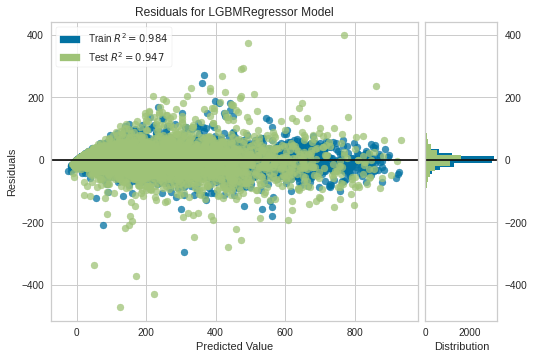

In [98]:
plot_model(tuned_lightgbm)

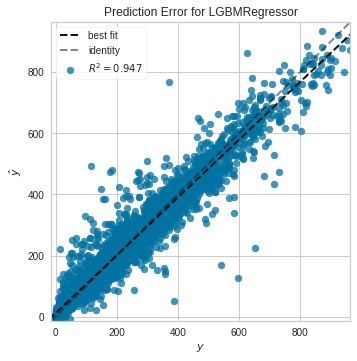

In [99]:
plot_model(tuned_lightgbm, plot = 'error')

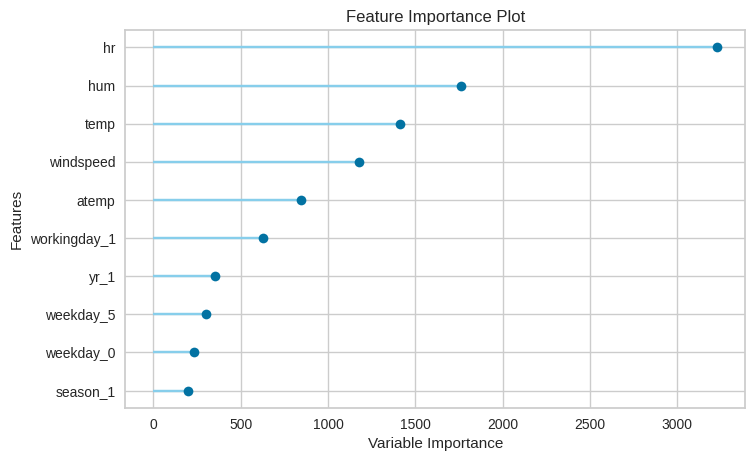

In [100]:
plot_model(tuned_lightgbm, plot='feature')

In [101]:
evaluate_model(tuned_lightgbm)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [102]:
predict_model(tuned_lightgbm);

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,24.7228,1757.662,41.9245,0.9475,0.3754,0.3441


In [103]:
final_lightgbm = finalize_model(tuned_lightgbm)

In [104]:
print(final_lightgbm)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=40,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=130, objective=None,
              random_state=8382, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


In [105]:
predict_model(final_lightgbm);

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,16.564,685.1131,26.1747,0.9795,0.3193,0.2665


In [106]:
unseen_predictions = predict_model(final_lightgbm, data=data_unseen)
unseen_predictions.head()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,Label
0,1/1/2011,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,40,20.215293
1,1/1/2011,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,1,-2.819640
2,1/1/2011,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,8,28.114803
3,1/1/2011,1,0,1,12,0,6,0,1,0.42,0.4242,0.77,0.2836,84,101.615444
4,1/1/2011,1,0,1,18,0,6,0,3,0.42,0.4242,0.88,0.2537,35,21.239420


In [107]:
from pycaret.utils import check_metric
check_metric(unseen_predictions.cnt, unseen_predictions.Label, 'R2')

0.9577

In [108]:
save_model(final_lightgbm,'Final LightGBM Model 10Dec2021')


Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[], target='cnt',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strategy='me...
                  LGBMRegressor(boosting_type='gbdt', class_weight=None,
                                colsample_bytree=1.0, importance_type='split',
                                learning_rate=0.1, max_depth=40,
                                min_child_samples=20, min_child_weight=0.001,
                  

In [109]:
saved_final_lightgbm = load_model('Final LightGBM Model 10Dec2021')

Transformation Pipeline and Model Successfully Loaded


In [110]:
new_prediction = predict_model(saved_final_lightgbm, data=data_unseen)

In [111]:
new_prediction.head()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,Label
0,1/1/2011,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,40,20.215293
1,1/1/2011,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,1,-2.819640
2,1/1/2011,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,8,28.114803
3,1/1/2011,1,0,1,12,0,6,0,1,0.42,0.4242,0.77,0.2836,84,101.615444
4,1/1/2011,1,0,1,18,0,6,0,3,0.42,0.4242,0.88,0.2537,35,21.239420


In [112]:
from pycaret.utils import check_metric
check_metric(new_prediction.cnt, new_prediction.Label, 'R2')


0.9577